###### In this notebook I attempt to fit my data using a neural network with the keras library. I import my cleaned data, perform a train-test split, make a simple neural network and build my model. Then I compare the predictions of my model with the actual results of my model to see if I can find issues in the predictions.

In [73]:
import pandas as pd
import numpy as np
import nltk
import re
sent_token = nltk.sent_tokenize
import csv  
from nltk import sent_tokenize, word_tokenize, pos_tag
import re
from sklearn.feature_extraction.text import CountVectorizer
wpt = nltk.WordPunctTokenizer()


file_path_comments = r'~/Documents/Springboard/Springboard/Data/cleaned_comment_data.csv'

#file_path_comments = r'/mnt/c/Users/msteele9/Documents/Springboard/Springboard/Data/cleaned_comment_data.csv'
clean_comments = pd.read_csv(file_path_comments, index_col = False)

In [74]:
from sklearn.model_selection import train_test_split
import random
from datetime import datetime

X = clean_comments['commentBody']
y = clean_comments['recommendations']
y.head(5)

0    2.0
1    1.0
2    3.0
3    7.0
4    5.0
Name: recommendations, dtype: float64

### In this next cell, I convert my integer target, 'recommendations', to a category target. I create bins such as (-1 to 1), (1 to 5) and so on, placing my recommendation values in the correct bin.

In [75]:
from keras.utils import to_categorical

#set up bins
bin = [-1, 1, 25, 1000000]
label = [0, 1, 2]
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(y, bin, labels=label)
category = category.to_frame()
category.columns = ['range']
#concatenate age and its bin
df_new = pd.concat([y,category],axis = 1)

y_binary = to_categorical(df_new['range'])

#df_new['range'].head(5)
print(y_binary)
y_binary.shape

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


(50000, 3)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=random.seed(datetime.now()))

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
 
vectorizer = CountVectorizer(binary=False, stop_words=stopwords.words('english'), 
                             lowercase=True, min_df=1, max_df=0.9, max_features=5000)
X_train_onehot = vectorizer.fit_transform(X_train)

### My model's accuracy function will report back the % of samples for which it places the comment in the correct category.

In [124]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
    
model = Sequential()
 
model.add(Dense(units=200, activation='relu', input_dim=len(vectorizer.get_feature_names())))
model.add(Dense(units=400, activation='linear'))
model.add(Dropout(0.2))
model.add(Dense(units=400, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=400, activation='relu'))
model.add(Dense(units=400, activation='relu'))
model.add(Dense(units=3, activation='relu'))
 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 200)               1000200   
_________________________________________________________________
dense_44 (Dense)             (None, 400)               80400     
_________________________________________________________________
dropout_15 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 400)               160400    
_________________________________________________________________
dropout_16 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 400)               160400    
_________________________________________________________________
dense_47 (Dense)             (None, 400)               160400    
__________

In [125]:
model.fit(X_train_onehot, y_train, 
          epochs=10, batch_size=1000, verbose=1, 
          validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 2s 60us/step - loss: 2.0692 - categorical_accuracy: 0.5487 - val_loss: 2.0032 - val_categorical_accuracy: 0.5732
Epoch 2/10
32000/32000 [==============================] - 1s 40us/step - loss: 2.0326 - categorical_accuracy: 0.6283 - val_loss: 2.0036 - val_categorical_accuracy: 0.5702
Epoch 3/10
32000/32000 [==============================] - 1s 39us/step - loss: 1.9072 - categorical_accuracy: 0.7320 - val_loss: 2.1074 - val_categorical_accuracy: 0.5526
Epoch 4/10
32000/32000 [==============================] - 1s 40us/step - loss: 1.7637 - categorical_accuracy: 0.8263 - val_loss: 2.3698 - val_categorical_accuracy: 0.5586
Epoch 5/10
32000/32000 [==============================] - 1s 40us/step - loss: 1.6863 - categorical_accuracy: 0.8661 - val_loss: 4.8611 - val_categorical_accuracy: 0.5481
Epoch 6/10
32000/32000 [==============================] - 1s 40us/step - loss: 1.6405 - categori

In [126]:
X_test_onehot = vectorizer.fit_transform(X_test)

In [127]:
scores = model.evaluate(X_test_onehot, y_test, verbose=1)
print("Accuracy:", model.metrics_names, scores[0], scores[1])

10000/10000 [==============================] - 1s 63us/step
Accuracy: ['loss', 'categorical_accuracy'] 7.5276925567626956 0.4861


###### Now let's examine the predictions of my model. First I example five sample data points, and then I plot all of my data vs. their predicted values.

In [128]:
X_train[:5]

35958    As it turns out you can kill 400,000 civilians...
32462    Two Faced<br/><br/>The plastic bag flies away....
29993    One of Renee Fleming's best friends, the mezzo...
34571    I know we are trying to see the dark side of g...
21821    This article made me sick to my stomach. What ...
Name: commentBody, dtype: object

In [129]:
prediction = model.predict(X_test_onehot)
prediction_int = np.argmax(prediction[:100], axis=1)
print(prediction_int)

[1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1
 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1]


In [130]:
y_test_int = np.argmax(y_test[:100], axis=1)
print(y_test_int )

[0 1 2 1 0 1 1 0 1 0 0 1 1 1 0 0 2 0 1 1 1 0 1 1 2 1 0 1 1 1 1 2 0 1 1 0 0
 2 1 1 1 1 1 0 2 0 1 2 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0
 0 0 0 1 1 1 0 1 1 0 2 1 1 1 1 0 1 2 2 1 0 0 0 1 2 0]


In [131]:
#print(y_test_int.median())
print(y_test_int.mean())
print(prediction_int.mean())

0.72
0.73


Text(0.5, 1.0, 'Predictions')

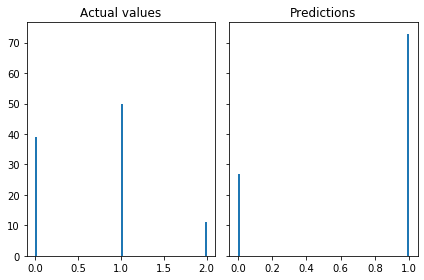

In [132]:
n_bins = 100

# Generate a normal distribution, center at x=0 and y=5
x = y_test_int
y = prediction_int

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)


# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
#axs[0].set_yscale('log')
axs[0].set_title('Actual values')
axs[1].hist(y, bins=n_bins)
#axs[1].set_yscale('log')
axs[1].set_title('Predictions')

### Here I try to use Transfer Learning with spaCy embeddings

In [ ]:
import os

#cwd = os.getcwd()  # Get the current working directory (cwd)
GLOVE_PATH = r'C:\Users\msteele9\Documents\Springboard'
os.chdir(GLOVE_PATH)

cwd = os.getcwd()

print(cwd)

files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

In [ ]:
word2idx = {word: idx for idx, word in enumerate(vectorizer.get_feature_names())}

import numpy as np

import os
cwd = os.getcwd()

GLOVE_PATH = r'C:\Users\msteele9\Documents\Springboard/glove.twitter.27B.25d.txt'
GLOVE_VECTOR_LENGHT = 25
 
def read_glove_vectors(path, lenght):
    embeddings = {}
    with open(path, encoding="utf-8") as glove_f:
        for line in glove_f:
            chunks = line.split()
            #assert len(chunks) == lenght + 1
            embeddings[chunks[0]] = np.array(chunks[1:], dtype='float32')
 
    return embeddings
 
GLOVE_INDEX = read_glove_vectors(GLOVE_PATH, GLOVE_VECTOR_LENGHT)
 
# Init the embeddings layer with GloVe embeddings
embeddings_index = np.zeros((len(vectorizer.get_feature_names()) + 1, GLOVE_VECTOR_LENGHT))
for word, idx in word2idx.items():
    try:
        embedding = GLOVE_INDEX[word]
        embeddings_index[idx] = embedding
    except:
        pass

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.layers import Dropout
    
model = Sequential()
 
model.add(Embedding(len(vectorizer.get_feature_names()) + 1,
                    GLOVE_VECTOR_LENGHT,  # Embedding size
                    weights=[embeddings_index],
                    #input_length=MAX_SEQ_LENGHT,
                    trainable=False))
model.add(LSTM(128))

model.add(Dense(units=400, activation='relu'))

model.add(Dense(units=1, activation='relu'))
 
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=[myAccuracy])
model.summary()

In [ ]:
model.fit(X_train_onehot, y_train, 
          epochs=3, batch_size=128, verbose=1, 
          validation_data=(X_test_onehot, y_test))
 
scores = model.evaluate(X_test_onehot, y_test, verbose=1)
print("Accuracy:", scores[1])  # 0.8296